# 군집화(custering) -K-Means Algorithm

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%matplotlib inline

## iris dataset 활용

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [5]:
iris_df = pd.DataFrame(iris.data, columns=['sl','w','pl','pw'])
iris_df['pca_x'] = iris_pca[:,0]
iris_df['pca_y'] = iris_pca[:,1]
iris_df.head()

,sl,w,pl,pw,pca_x,pca_y
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


## K-Means 모델 생성/학습

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [8]:
kmeans.fit(iris_std)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [9]:
iris_df['target'] = iris.target
iris_df['cluster'] = kmeans.labels_
iris_df.tail()

,sl,w,pl,pw,pca_x,pca_y,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,0
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,0
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,0
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [11]:
clustering_result = iris_df.groupby(['target','cluster']).count()
clustering_result

sl   w  pl  pw  pca_x  pca_y
target cluster                              
0      1        50  50  50  50     50     50
1      0        11  11  11  11     11     11
       2        39  39  39  39     39     39
2      0        36  36  36  36     36     36
       2        14  14  14  14     14     14

## 데이터 시각화

## -군집화한 결과를 차원축소하여 시각화

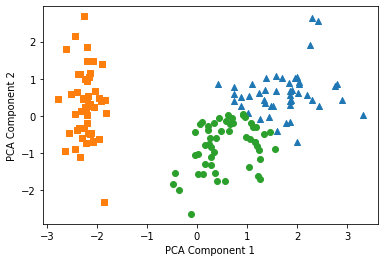

In [13]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df.cluster == i]['pca_x']
    y_axis_data = iris_df[iris_df.cluster == i]['pca_y']
    plt.scatter(x_axis_data, y_axis_data, marker=marker)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()